In [43]:
!pip install -q requests beautifulsoup4 pandas matplotlib seaborn

In [53]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL чарта Shazam
url = "https://www.shazam.com/charts/top-50/russia/moscow"

# Заголовки для имитации запроса из браузера
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Получение HTML-содержимого страницы
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Извлечение данных
tracks = []
artists = []

# Поиск всех элементов списка чарта
chart_items = soup.find_all('li', {'class': 'chart-list-item'})

if chart_items:
    for item in chart_items:
        # Поиск названия трека внутри элемента списка
        track_element = item.find('a', {'data-test-id': 'charts_userevent_list_songTitle'})
        # Поиск имени исполнителя внутри элемента списка
        artist_element = item.find('a', {'data-test-id': 'charts_userevent_list_artistName'})

        track_title = track_element.get_text(strip=True) if track_element else None
        artist_name = artist_element.get_text(strip=True) if artist_element else None

        # Добавляем данные только если найдены и трек, и исполнитель
        if track_title and artist_name:
            tracks.append(track_title)
            artists.append(artist_name)
else:
    print("Элементы чарта не найдены на странице.")

# Создание DataFrame
df_tracks = pd.DataFrame({'Track Title': tracks, 'Artist Name': artists})

# Отображение первых строк DataFrame
display(df_tracks.head())

Элементы чарта не найдены на странице.


,Track Title,Artist Name


In [48]:
# Анализ данных: Нахождение топ-5 самых часто встречающихся исполнителей
top_artists = df_tracks['Artist Name'].value_counts().head(5)

# Отображение топ-5 исполнителей
print("Топ-5 самых часто встречающихся исполнителей:")
display(top_artists)

Топ-5 самых часто встречающихся исполнителей:


,count
Artist Name,
MONA,2
AY YOLA,2
SVOBODA & Alex Kontsov,1
Icegergert & Zivert,1
VAD BOYZ,1


/tmp/ipython-input-1001648750.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')


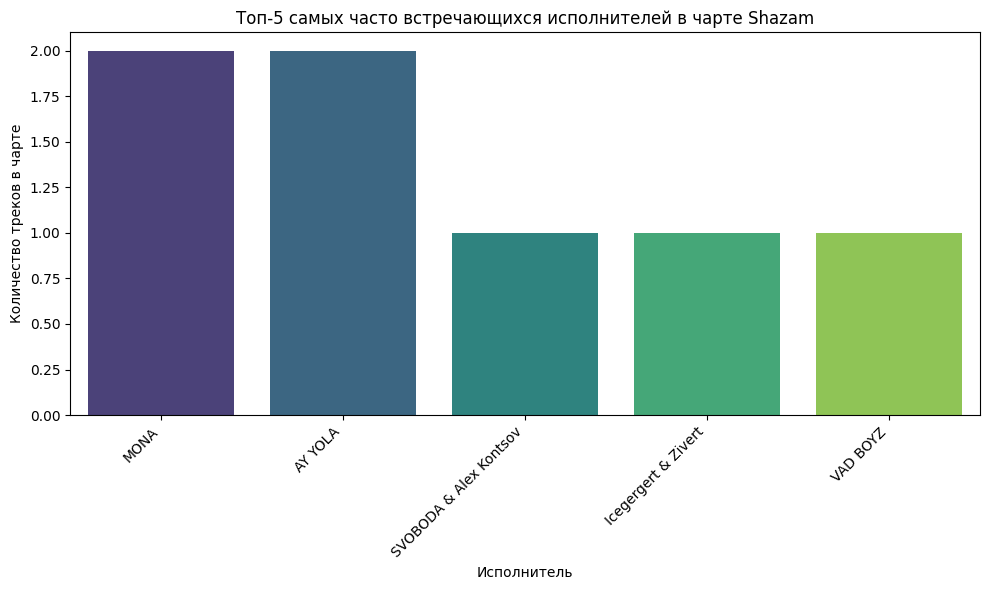

In [49]:
# Визуализация: Построение гистограммы топ-5 исполнителей
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')
plt.title('Топ-5 самых часто встречающихся исполнителей в чарте Shazam')
plt.xlabel('Исполнитель')
plt.ylabel('Количество треков в чарте')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()